In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [197]:
# read csv
df = pd.read_csv('unfiltered_gwq.csv')
# include only state,< district, year
df = df[['state', 'district', 'year', 'chloride']]
# drop duplicates
df = df.drop_duplicates()
# drop rows with missing values
df = df.dropna()
# change indexing
df = df.reset_index(drop=True)
# save df as filtered_gwq.csv
df.to_csv('filtered_gwq.csv', index=False)

In [198]:
df = pd.read_csv('filtered_gwq.csv')
# for filtered_gwq.csv, remove data if state (telangana or andhra pradesh) and year is <= 2004
df = df[~((df['state'] == 'Telangana') & (df['year'] < 2004))]
df = df[~((df['state'] == 'Andhra Pradesh') & (df['year'] < 2004))]
# change indexing
df = df.reset_index(drop=True)
# save df as filtered_gwq.csv
df.to_csv('filtered_gwq.csv', index=False)

/tmp/ipykernel_2435/3592663474.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('state').mean()


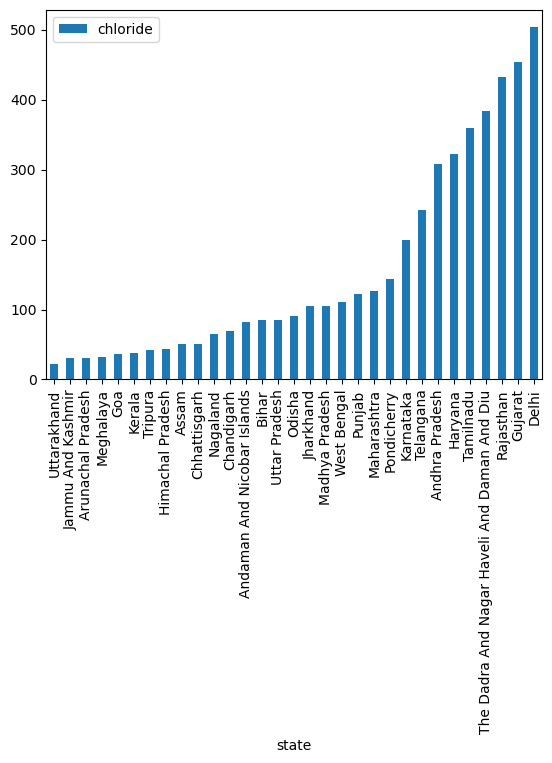

In [199]:
# read filtered_gwq.csv and draw histogram for state-wise avg chloride concentration
df = pd.read_csv('filtered_gwq.csv')
df = df.groupby('state').mean()
df = df.reset_index()
# print(df)

# sort by concentration
df = df.sort_values('chloride')
df.plot(x='state', y='chloride', kind='bar')
plt.show()

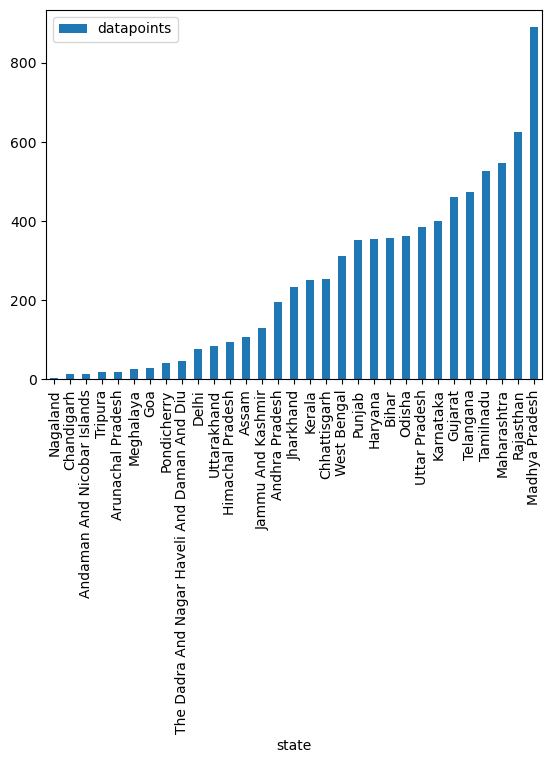

In [200]:
# print number of datapoints vs state
df = pd.read_csv('filtered_gwq.csv')
df = df.groupby('state').count()
df = df.reset_index()
df = df[['state', 'district']]
df.columns = ['state', 'datapoints']
df = df.sort_values('datapoints')
# print(df)
df.plot(x='state', y='datapoints', kind='bar')
plt.show()

                state missing expected  missing_ratio
2       Uttar Pradesh    1003     1387       0.723143
25            Tripura      57       76       0.750000
17              Assam     386      494       0.781377
27          Meghalaya     106      133       0.796992
23  Arunachal Pradesh      94      114       0.824561
26           Nagaland      16       19       0.842105


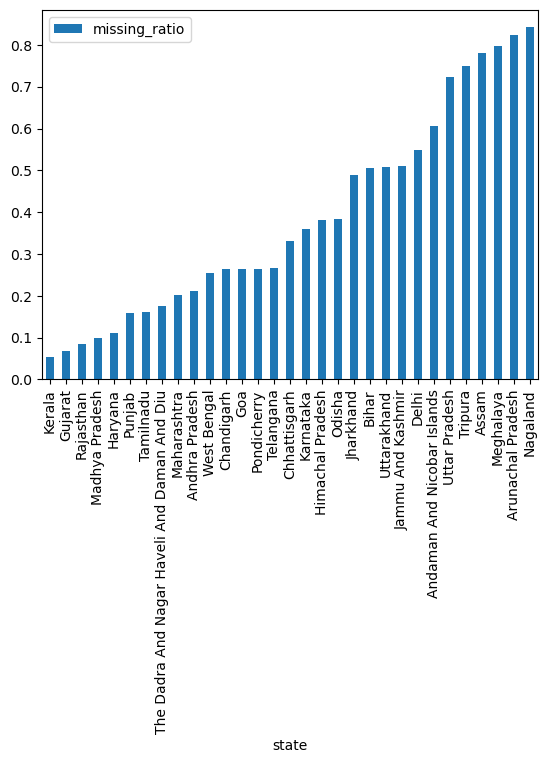

In [201]:
df = pd.read_csv('filtered_gwq.csv')
# Store names of all states
states = df['state'].unique()
# Create a new dataframe to store missing counts (integer)
incomplete_data = pd.DataFrame(columns=['state', 'missing', 'expected', 'missing_ratio'])
# Calculate missing data for each state
for state in states:
    districts = df[df['state'] == state]['district'].unique()
    available = df[df['state'] == state]
    missing_count = 19 * len(districts) - len(available)
    expected_count = 19 * len(districts)
    missing_ratio = 1 - (len(available) / expected_count)
    incomplete_data = pd.concat([incomplete_data, pd.DataFrame({'state': [state], 'missing': [missing_count], 'expected': [expected_count], 'missing_ratio': [missing_ratio]})], ignore_index=True)
incomplete_data = incomplete_data.sort_values('missing_ratio')
incomplete_data.plot(x='state', y='missing_ratio', kind='bar')
# Print states with missing ratio greater than 0.7
print(incomplete_data[incomplete_data['missing_ratio'] > 0.7])

In [202]:
df1 = pd.read_csv('unfiltered_sdp1.csv')
df2 = pd.read_csv('unfiltered_sdp2.csv')
df3 = pd.read_csv('unfiltered_sdp3.csv')
states = df1.keys()[1:]
df_sdp = pd.DataFrame(columns = df1.keys())
for state in states:
    df1_state = df1[state]
    df2_state = df2[state]
    df3_state = df3[state]
    # scaling factor 1 is df3_state's first value / df2_state's last value
    scaling_factor1 = df3_state.iloc[0] / df2_state.iloc[-1]
    # change df2_state values by scaling factor 1
    df2_state = df2_state * scaling_factor1
    # scaling factor 2 is df2_state's first value / df1_state's last value
    scaling_factor2 = df2_state.iloc[0] / df1_state.iloc[-1]
    # change df1_state values by scaling factor 2
    df1_state = df1_state * scaling_factor2
    
    # remove first and last elements of df2_state
    df2_state = df2_state[1:-1]
    df_sdp[state] = pd.concat([df1_state, df2_state, df3_state], ignore_index=True)
    print(state, scaling_factor1)
# df_sdp make years as 1999, 2000, and so on
df_sdp['YEAR'] = range(1999, 2019)
df_sdp.to_csv('filtered_sdp.csv', index=False)


ANDHRA PRADESH 1.7749355273186673
ARUNACHAL PRADESH 2.0527794501304437
ASSAM 1.9323294792506946
BIHAR 1.7641695169123153
GOA 1.6327591391382792
GUJARAT 1.5815706203285385
HARYANA 1.7104899604473798
HIMACHAL PRADESH 1.7828302164629657
JAMMU AND KASHMIR 1.92171226831421
JHARKHAND 1.713923924298564
KARNATAKA 2.237348814707305
KERALA 1.8541163835740326
MADHYA PRADESH 1.6649233490566038
CHHATTISGARH 2.0540388363531363
MAHARASHTRA 1.618894272773256
MANIPUR 1.7936681222707425
MEGHALAYA 1.749781617004756
MIZORAM 1.4538024971623156
NAGALAND 1.1359380045205036
ODISHA 1.970760798239858
PUNJAB 1.7463481936242125
RAJASTHAN 1.949854253288549
SIKKIM 2.1420404573438874
TAMILNADU 1.7450557297649725
TRIPURA 1.2078912696761668
UTTAR PRADESH 1.7656708860759494
UTTARAKHAND 1.9329642830059908
WEST BENGAL 1.6349436136985545
ANDAMAN AND NICOBAR ISLANDS 0.9921305741766249
CHANDIGARH 1.4156702065390083
DELHI 1.741071922621485
PONDICHERRY 1.4900727344210734
TELANGANA 2.0245015628697027


In [203]:
# add sdp for every data in gwq
df_gwq = pd.read_csv('filtered_gwq.csv')
df_sdp = pd.read_csv('filtered_sdp.csv')
n_samples = len(df_gwq)
# for every data in gwq, find the corresponding sdp value
for i in range(n_samples):
    state = df_gwq['state'][i]
    year = df_gwq['year'][i]
    state = state.upper()
    try:
        sdp = df_sdp[state][year - 1999]
        df_gwq.loc[i, 'sdp'] = sdp
    except:
        print(state)
        # remove data
        df_gwq = df_gwq.drop(i)
# sort by state
df_gwq.dropna()
df_gwq = df_gwq.sort_values('state')
df_gwq.to_csv('filtered_gwq_sdp.csv', index=False)

THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU
THE DADRA 

In [204]:
# # i indexes districts, t indexes years, and ui,t is random error.
# # GWQi,t = β0 + β1SDPi,t + ui,t
# df_gwq = pd.read_csv('filtered_gwq_sdp.csv')
# y_mean = df_gwq['chloride'].mean()
# # print(y_mean)
# # calculate x_mean
# x_mean = df_gwq['sdp'].mean()
# # print(x_mean)
# # calculate sum(xi-x_mean)(yi-y_mean) / sum(xi-x_mean)^2
# beta1 = 0
# beta2 = 0
# n_samples = len(df_gwq)
# for i in range(n_samples):
#     beta1 += (df_gwq['sdp'][i] - x_mean) * (df_gwq['chloride'][i] - y_mean)
#     beta2 += (df_gwq['sdp'][i] - x_mean) ** 2
# beta1 = beta1 / beta2
# print(beta1)
# # calculate beta0
# beta0 = y_mean - beta1 * x_mean
# print(beta0)
# # summarize the results in a table and interpret
# # print(df_gwq)
# df_gwq['predicted_chloride'] = beta0 + beta1 * df_gwq['sdp']
# df_gwq['error'] = df_gwq['chloride'] - df_gwq['predicted_chloride']
# df_gwq.to_csv('filtered_gwq_sdp_predicted.csv', index=False)
# # calculate R^2
# ssr = 0
# sst = 0
# for i in range(n_samples):
#     ssr += (df_gwq['predicted_chloride'][i] - y_mean) ** 2
#     sst += (df_gwq['chloride'][i] - y_mean) ** 2
# r_squared = ssr / sst
# print(r_squared)

In [205]:
# gwq = beta0 + beta1 * sdp + ui
X = df_gwq['sdp']
X = sm.add_constant(X)
y = df_gwq['chloride']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())
r_squared = model.rsquared
print("R-squared:", r_squared)
print(model.params)
# print mean, median, 25th percentile, 75th percentile, and 95th percentile for all variables
print(df_gwq.describe(percentiles=[0.25, 0.5, 0.75, 0.95]))

# calculate errors
predicted_values = model.predict(X)
residuals = y - predicted_values
df_gwq['predicted_chloride'] = predicted_values
df_gwq['residual'] = residuals
df_gwq.to_csv('filtered_gwq_sdp_predicted.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     68.09
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.82e-16
Time:                        18:59:36   Log-Likelihood:                -52452.
No. Observations:                7640   AIC:                         1.049e+05
Df Residuals:                    7638   BIC:                         1.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.7262      4.284     38.919      0.0

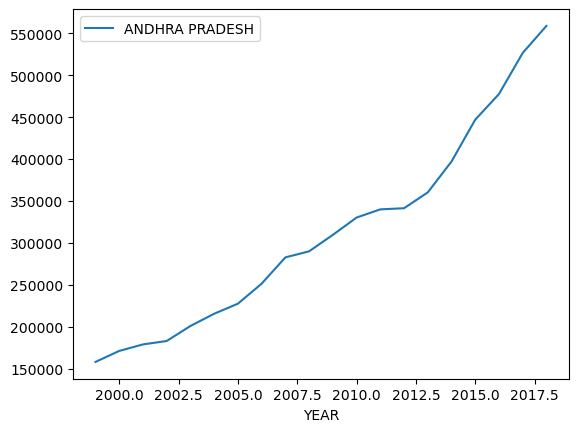

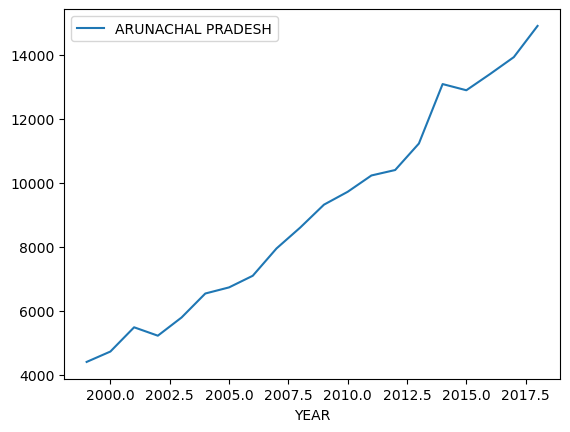

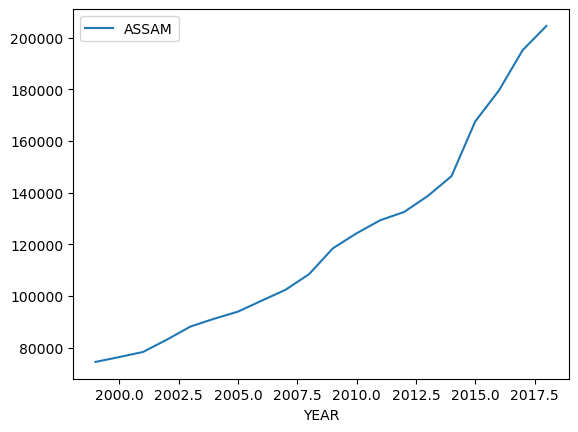

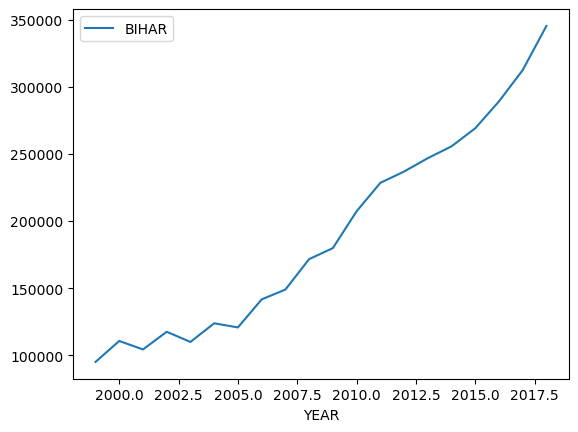

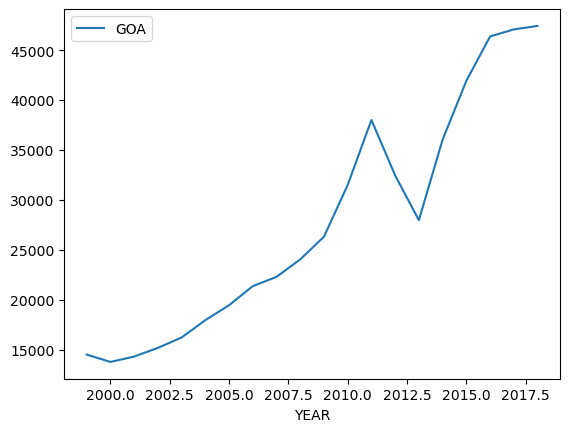

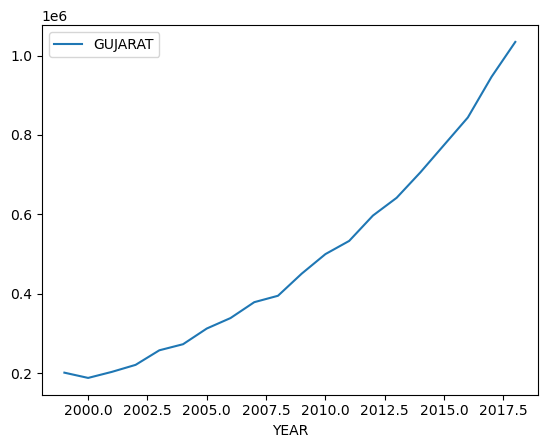

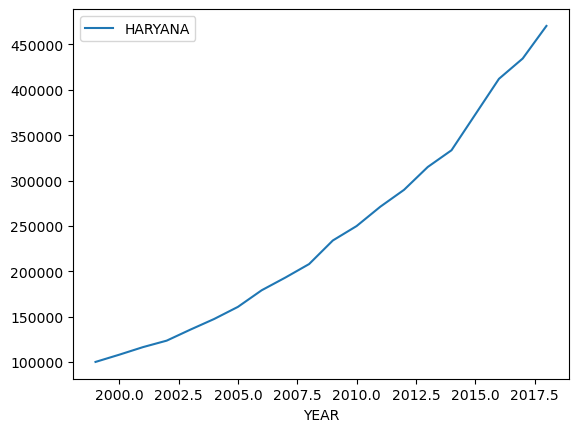

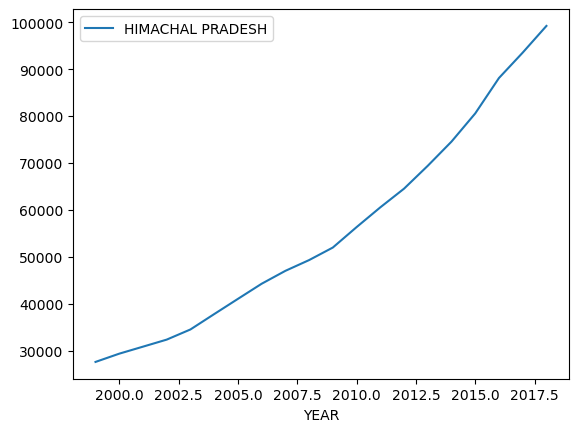

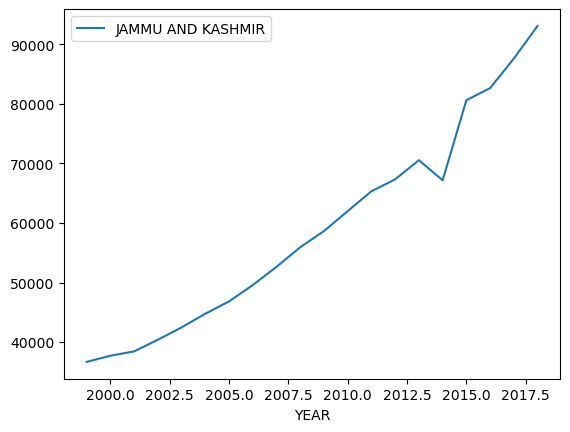

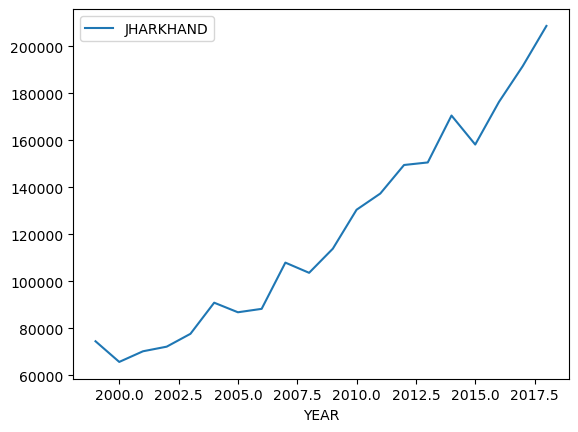

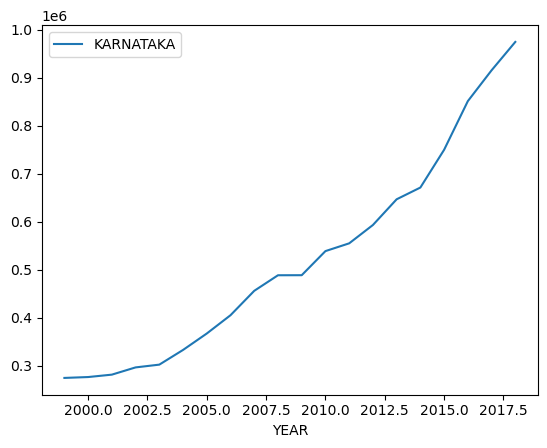

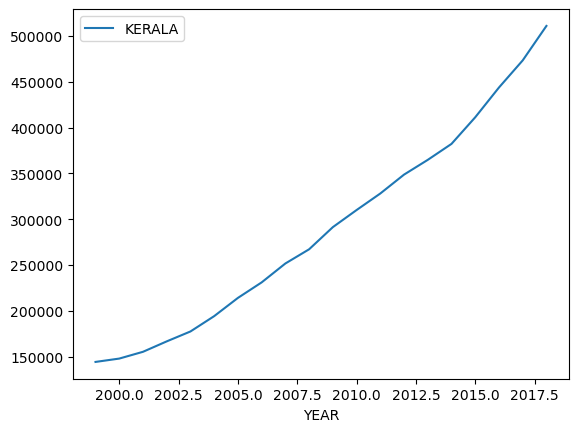

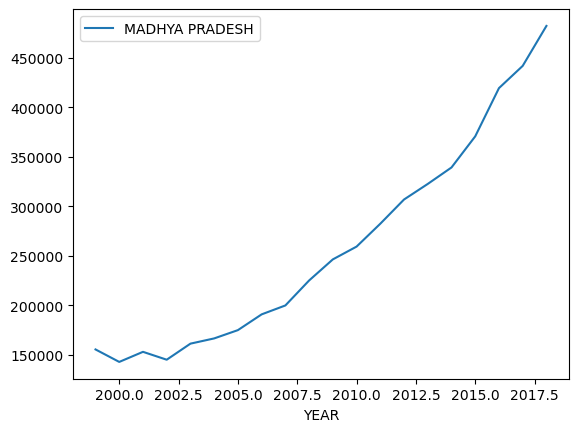

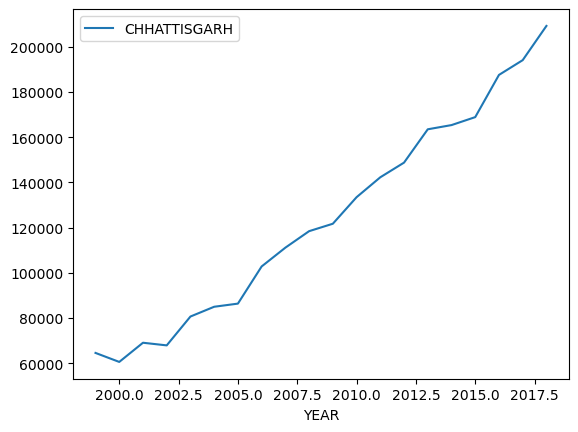

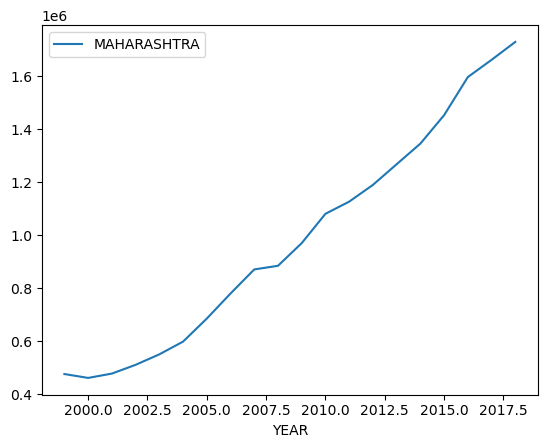

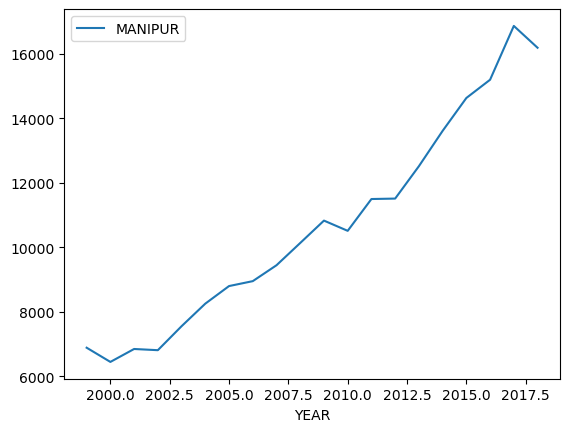

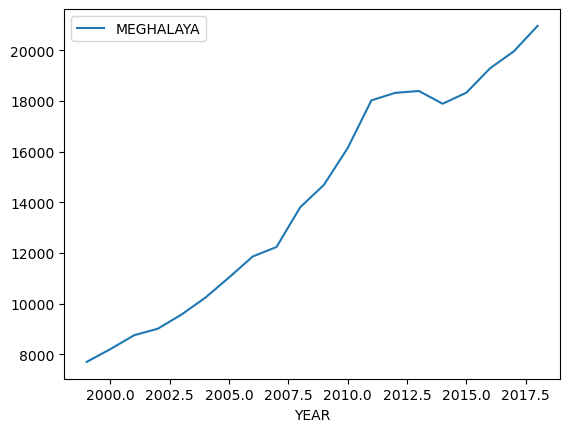

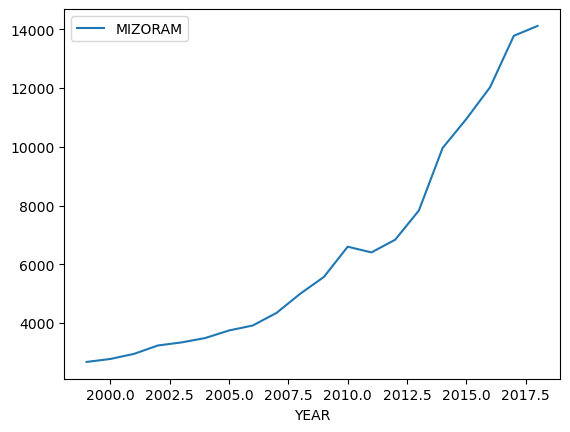

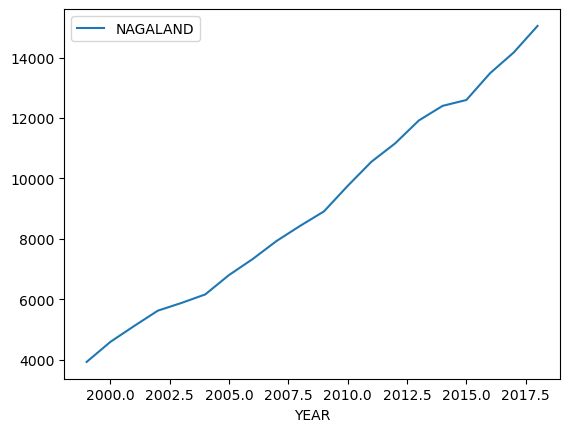

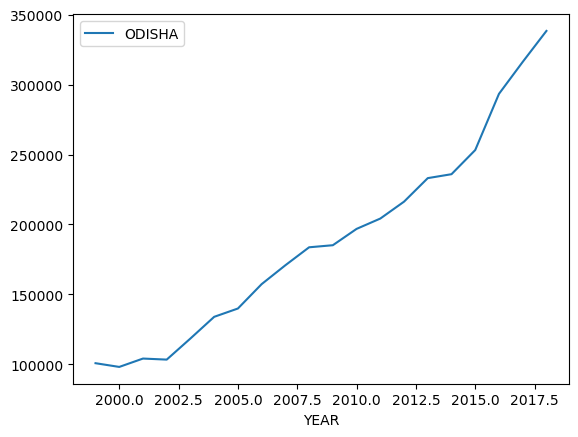

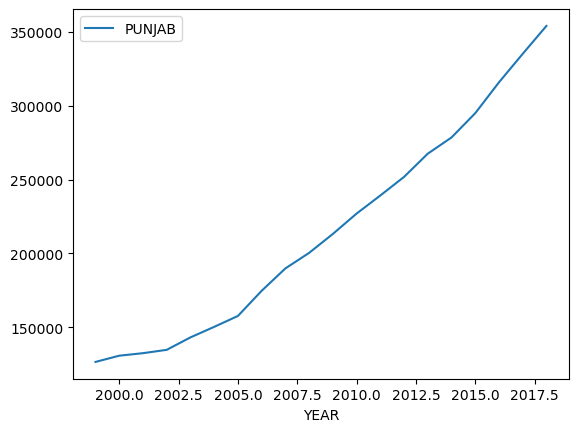

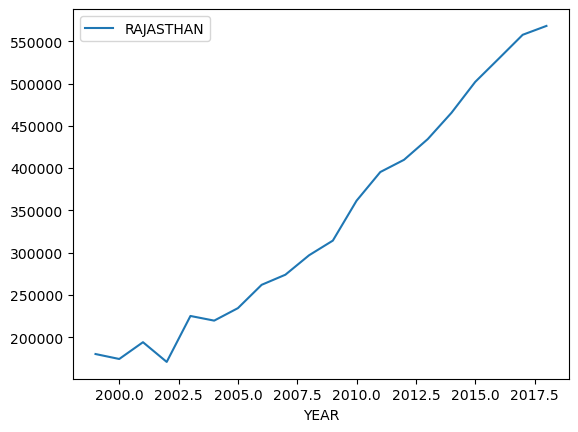

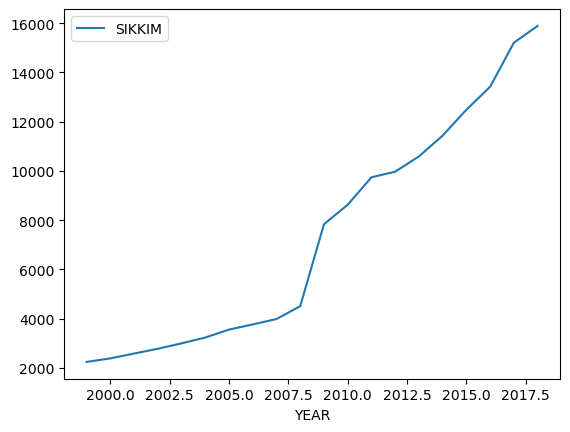

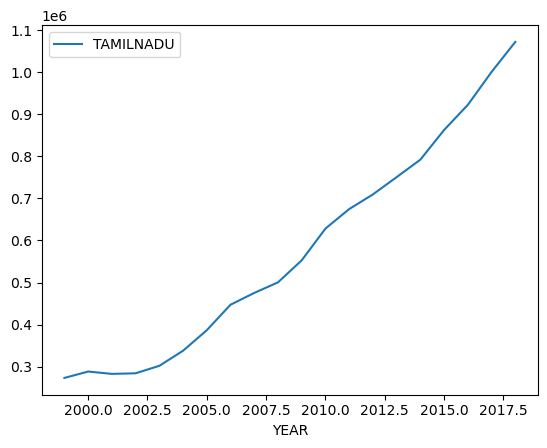

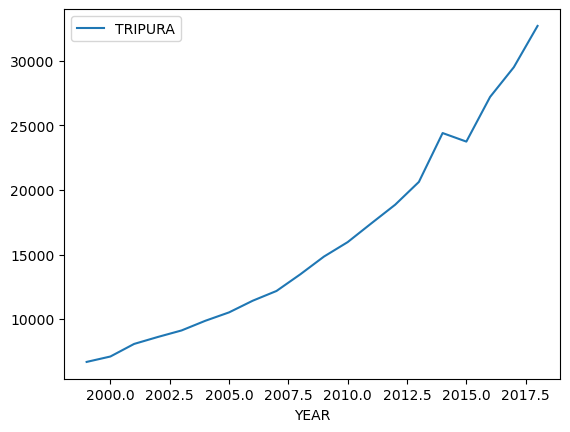

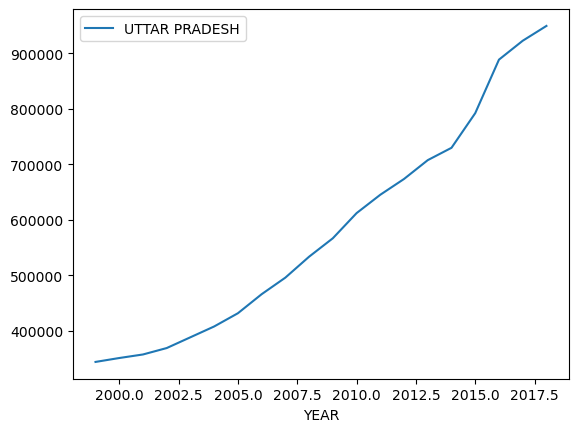

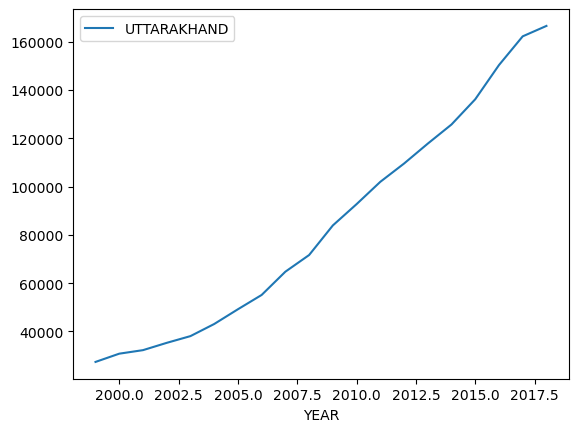

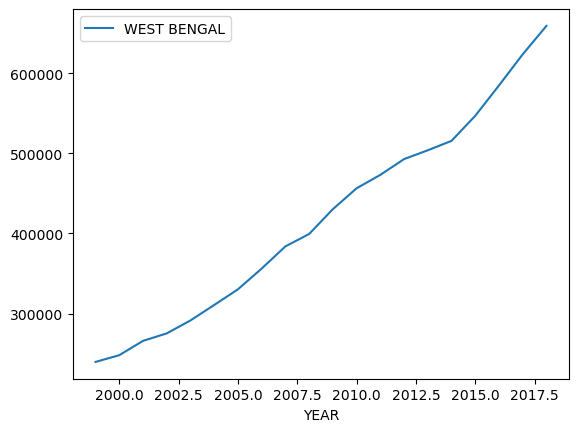

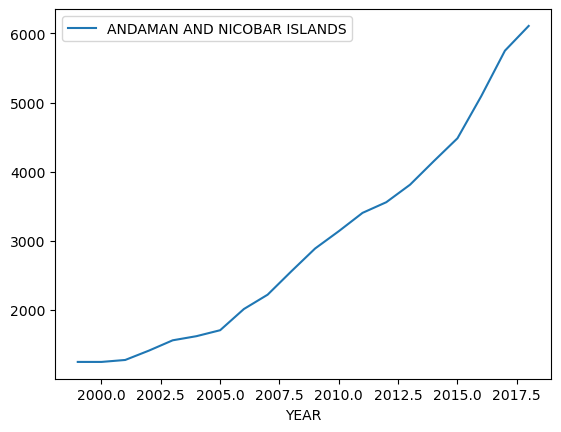

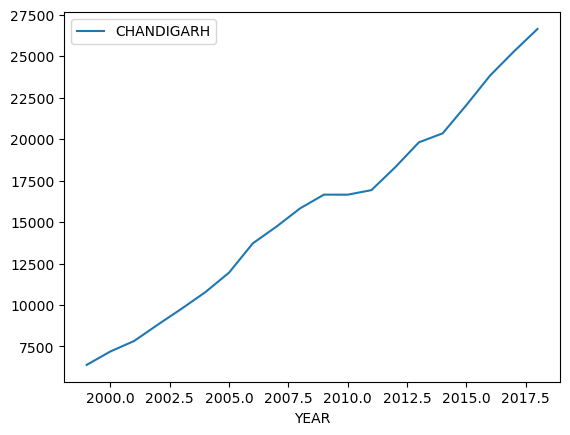

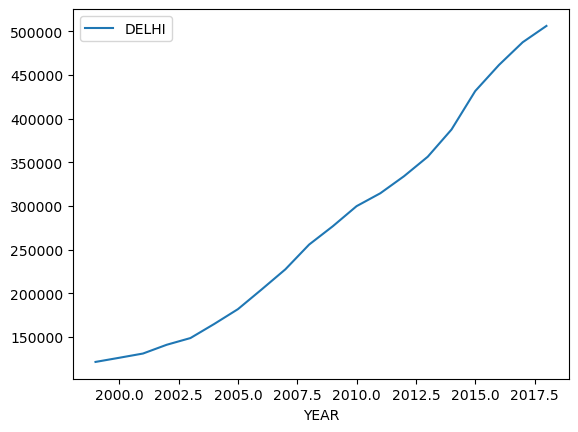

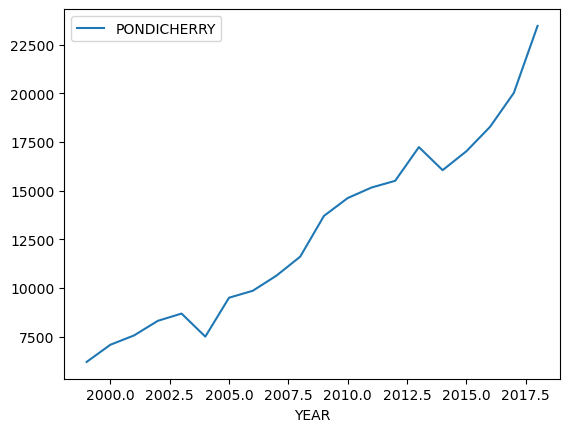

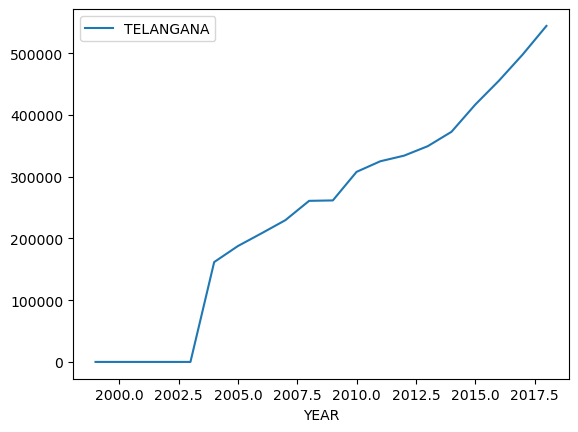

In [206]:
# plot graph for all states sdp vs year to verify sdp estimations from filtered_sdp.csv
df_sdp = pd.read_csv('filtered_sdp.csv')
states = df_sdp.keys()[1:]
# print(states)
for state in states:
    df_sdp.plot(x='YEAR', y=state)
    plt.show()

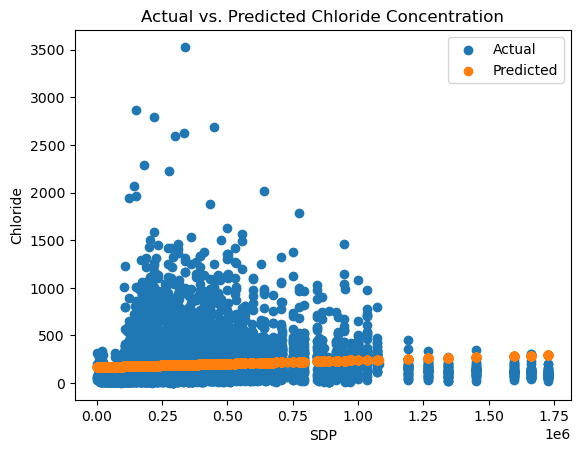

In [207]:
df_gwq = pd.read_csv('filtered_gwq_sdp_predicted.csv')
# Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual')
plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted')
plt.xlabel('SDP')
plt.ylabel('Chloride')
plt.title('Actual vs. Predicted Chloride Concentration')

plt.legend()

/tmp/ipykernel_2435/3679824904.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='red', lw=0.5)
/tmp/ipykernel_2435/3679824904.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='green', lw=0.5)


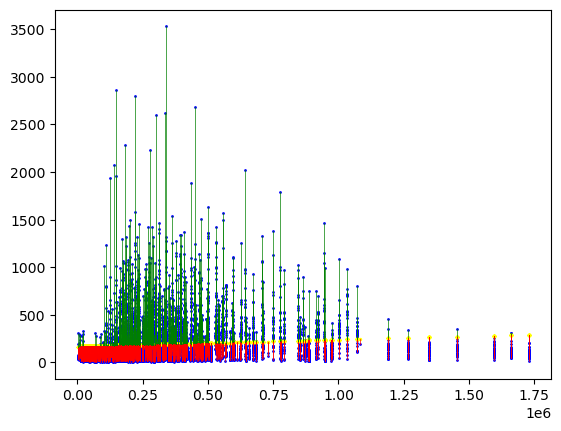

In [208]:
# draw gwq vs sdp graph, and draw lines to connect all actual and predicted values
df_gwq = pd.read_csv('filtered_gwq_sdp_predicted.csv')
n_samples = len(df_gwq)
plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual', color='blue', s=1)
plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted', color='yellow', s=2)
for i in range(n_samples):
    # plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='black', lw=0.5)
    # for +ve error, use green color
    # for -ve error, use orange color
    if df_gwq['residual'][i] > 0:
        plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='green', lw=0.5)
    elif df_gwq['residual'][i] < 0:
        plt.plot([df_gwq['sdp'][i], df_gwq['sdp'][i]], [df_gwq['chloride'][i], df_gwq['predicted_chloride'][i]], 'r-', color='red', lw=0.5)
plt.show()


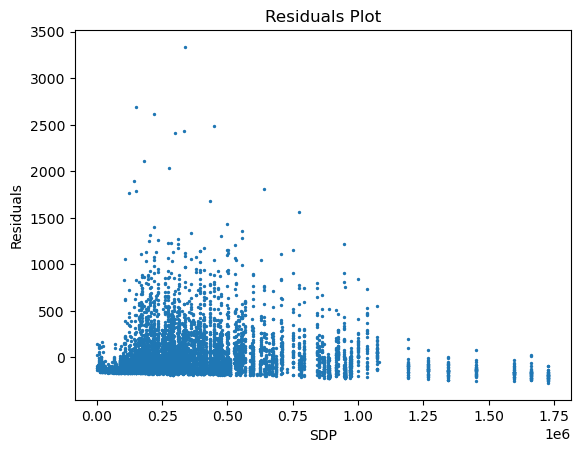

In [209]:
# Plot 2: Residuals (ûi,t) on Y-axis and SDP on X-axis
plt.scatter(df_gwq['sdp'], residuals, s=2)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

-2.6338966563344e-09


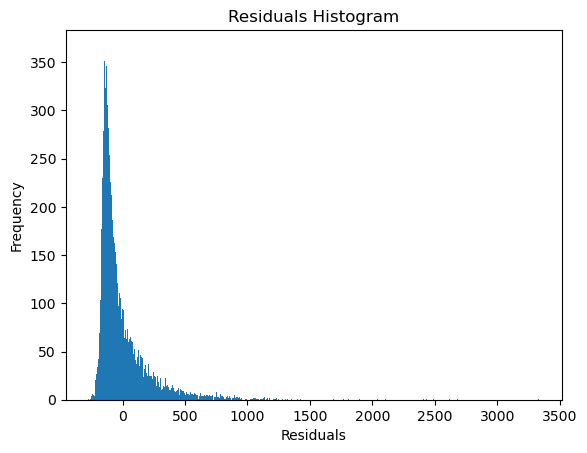

In [210]:
# Plot a histogram of ûi,t and verify that ∑û = 0.
df_gwq = pd.read_csv('filtered_gwq_sdp_predicted.csv')
plt.hist(df_gwq['residual'], bins=500)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
# plt.show()
# verify that ∑û = 0
print(df_gwq['residual'].sum())
# print(model.resid.sum())

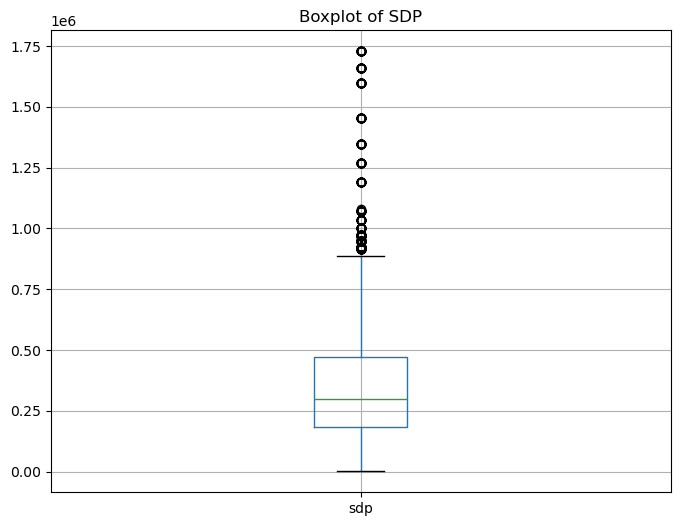

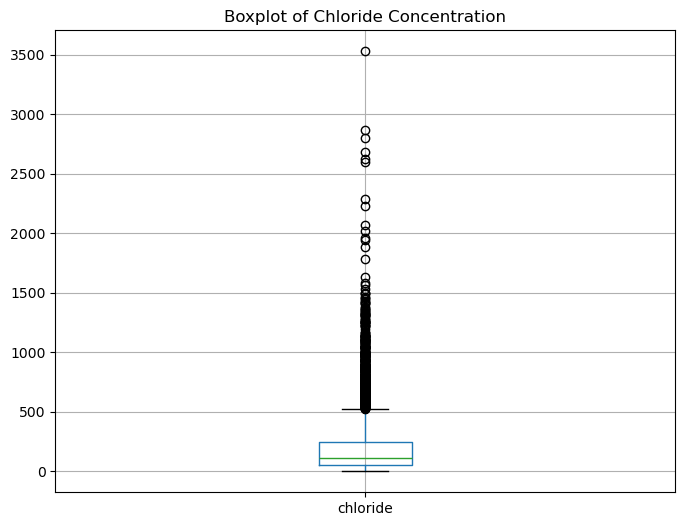

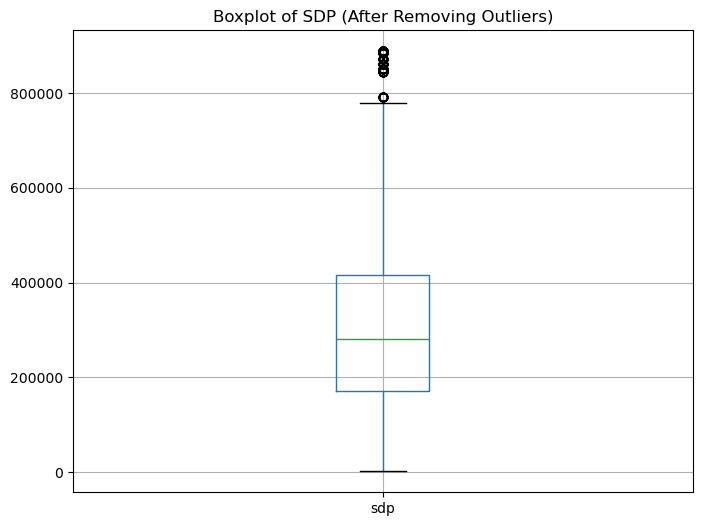

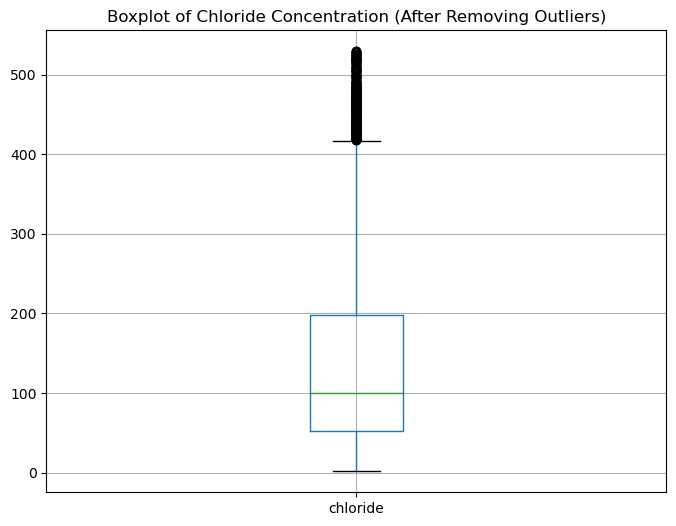

In [211]:
# Read the data
df_gwq = pd.read_csv('filtered_gwq_sdp.csv')

# Visualize boxplot for 'sdp'
plt.figure(figsize=(8, 6))
df_gwq.boxplot(column='sdp')
plt.title('Boxplot of SDP')
plt.show()

# Visualize boxplot for 'chloride'
plt.figure(figsize=(8, 6))
df_gwq.boxplot(column='chloride')
plt.title('Boxplot of Chloride Concentration')
plt.show()

# Identify and remove outliers for 'sdp'
q1 = df_gwq['sdp'].quantile(0.25)
q3 = df_gwq['sdp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_sdp = df_gwq[(df_gwq['sdp'] < lower_bound) | (df_gwq['sdp'] > upper_bound)]
df_gwq = df_gwq[~((df_gwq['sdp'] < lower_bound) | (df_gwq['sdp'] > upper_bound))]

# Identify and remove outliers for 'chloride'
q1 = df_gwq['chloride'].quantile(0.25)
q3 = df_gwq['chloride'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_chloride = df_gwq[(df_gwq['chloride'] < lower_bound) | (df_gwq['chloride'] > upper_bound)]
df_gwq = df_gwq[~((df_gwq['chloride'] < lower_bound) | (df_gwq['chloride'] > upper_bound))]

# Visualize boxplot for 'sdp' after removing outliers
plt.figure(figsize=(8, 6))
df_gwq.boxplot(column='sdp')
plt.title('Boxplot of SDP (After Removing Outliers)')
plt.show()

# Visualize boxplot for 'chloride' after removing outliers
plt.figure(figsize=(8, 6))
df_gwq.boxplot(column='chloride')
plt.title('Boxplot of Chloride Concentration (After Removing Outliers)')
plt.show()

# Save the cleaned data
df_gwq.to_csv('filtered_gwq_sdp_cleaned.csv', index=False)

In [212]:
# # kuznets without gini
# # gwq = b0 + b1sdp + b2sdp^2 + b3sdp^3 + ui,t
# df_gwq = pd.read_csv('filtered_gwq_sdp.csv')
# # Define the independent variable (predictor) and dependent variable
# X = df_gwq['sdp']
# Y = df_gwq['chloride']
# # Add a constant to the independent variable for the intercept term
# X = sm.add_constant(X)
# # Create additional columns for the squared and cubed terms of the predictor
# X['sdp_squared'] = X['sdp'] ** 2
# X['sdp_cubed'] = X['sdp'] ** 3
# # Fit the cubic regression model
# model = sm.OLS(Y, X).fit()
# # Print the summary of the regression results
# print(model.summary())
# # Get the estimated coefficients
# beta0 = model.params['const']
# beta1 = model.params['sdp']
# beta2 = model.params['sdp_squared']
# beta3 = model.params['sdp_cubed']
# # Predicted values
# df_gwq['predicted_chloride'] = beta0 + beta1 * df_gwq['sdp'] + beta2 * (df_gwq['sdp'] ** 2) + beta3 * (df_gwq['sdp'] ** 3)
# # Calculate residuals
# df_gwq['residuals'] = df_gwq['chloride'] - df_gwq['predicted_chloride']
# # Calculate R-squared
# r_squared = model.rsquared
# print("R-squared:", r_squared)
# # print estimators 
# print("Estimated coefficients:")
# print("Beta0:", beta0)
# print("Beta1:", beta1)
# print("Beta2:", beta2)
# print("Beta3:", beta3)
# # Save the results to a CSV file
# df_gwq.to_csv('filtered_gwq_sdp_predicted_cubic.csv', index=False)
# # plot filtered_gwq_sdp_predicted_cubic.csv
# df_gwq = pd.read_csv('filtered_gwq_sdp_predicted_cubic.csv')
# # sum of residuals
# print(df_gwq['residuals'].sum())
# # Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
# plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual')
# plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted')
# plt.xlabel('SDP')
# plt.ylabel('Chloride')
# plt.title('Actual vs. Predicted Chloride Concentration')
# plt.legend()
# plt.show()

In [213]:
# merge gini.csv and filtered_gwq_sdp.csv using district as the common data.
# if district not in gini.csv, print district
# note that districts in gini.csv are capitalized, but not in filtered_gwq_sdp.csv
df_gini = pd.read_csv('gini.csv')
df_gwq = pd.read_csv('filtered_gwq_sdp.csv')
n_samples = len(df_gwq)
for i in range(n_samples):
    district = df_gwq['district'][i]
    district = district.upper()
    if district not in df_gini['district'].values:
        print(district)
    else:
        df_gwq.loc[i, 'gini'] = df_gini[df_gini['district'] == district]['gini'].values[0]
df_gwq = df_gwq.dropna()
df_gwq.to_csv('filtered_gwq_sdp_gini.csv', index=False)


SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
SURGUJA
REASIÃƑÂ€ŠÃ‚Â 
REASIÃƑÂ€ŠÃ‚Â 
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELAGAVI
BELLARY
BELLARY
BELLARY
BELLARY
BELLARY
BELLARY
BELLARY
BELLARY
BELLARY
BELLARY
BELAGAVI
BELLARY
BELLARY
BELLARY
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
WEST NIMAR
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
DEOGARH
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SUBARNAPUR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NAGAR
SHAHID BHAGAT SINGH NA

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           9.73e-96
Time:                        18:59:47   Log-Likelihood:                -50351.
No. Observations:                7367   AIC:                         1.007e+05
Df Residuals:                    7364   BIC:                         1.007e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.967e-09   1.29e-10     46.379      

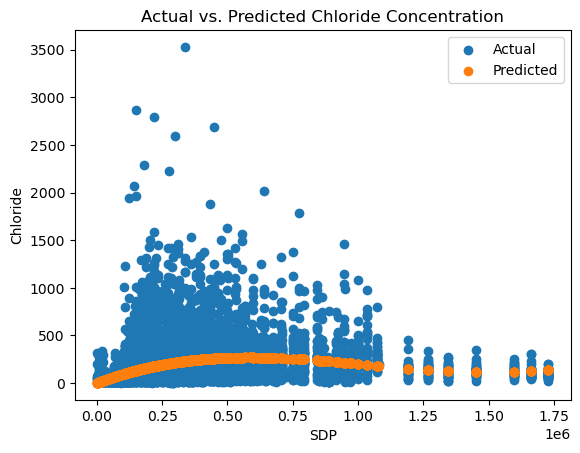

18137.607264317492


In [214]:
# kuznets with gini
# gwq = b0 + b1sdp + b2sdp^2 + b3sdp^3 + d1GINI + ui,t
df_gwq = pd.read_csv('filtered_gwq_sdp_gini.csv')
# Define the independent variable (predictor) and dependent variable
X = df_gwq[['sdp', 'gini']]
Y = df_gwq['chloride']
# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)
# Create additional columns for the squared and cubed terms of the predictor
X['sdp_squared'] = X['sdp'] ** 2
X['sdp_cubed'] = X['sdp'] ** 3
# Fit the cubic regression model
model = sm.OLS(Y, X).fit()
# Print the summary of the regression results
print(model.summary())
# Get the estimated coefficients
beta0 = model.params['const']
beta1 = model.params['sdp']
beta2 = model.params['sdp_squared']
beta3 = model.params['sdp_cubed']
beta4 = model.params['gini']
# Predicted values
df_gwq['predicted_chloride'] = beta0 + beta1 * df_gwq['sdp'] + beta2 * (df_gwq['sdp'] ** 2) + beta3 * (df_gwq['sdp'] ** 3) + beta4 * df_gwq['gini']
# Calculate residuals
df_gwq['residuals'] = df_gwq['chloride'] - df_gwq['predicted_chloride']
# Calculate R-squared
r_squared = model.rsquared
print("R-squared:", r_squared)
# print estimators
print("Estimated coefficients:")
print("Beta0:", beta0)
print("Beta1:", beta1)
print("Beta2:", beta2)
print("Beta3:", beta3)
print("Beta4:", beta4)
# Save the results to a CSV file
df_gwq.to_csv('filtered_gwq_sdp_gini_predicted.csv', index=False)
# plot filtered_gwq_sdp_gini_predicted.csv
df_gwq = pd.read_csv('filtered_gwq_sdp_gini_predicted.csv')
# Plot 1: Groundwater quality indicator (chloride) on Y-axis and SDP on X-axis
plt.scatter(df_gwq['sdp'], df_gwq['chloride'], label='Actual')
plt.scatter(df_gwq['sdp'], df_gwq['predicted_chloride'], label='Predicted')
plt.xlabel('SDP')
plt.ylabel('Chloride')
plt.title('Actual vs. Predicted Chloride Concentration')
plt.legend()
plt.show()
# print sum of residuals
print(df_gwq['residuals'].sum())

In [215]:
# Articulate the relationship between economic growth (as measured by SDP) and groundwater quality on year-by-year basis
# (as measured by chloride concentration) in the context of the Kuznets curve.
df_gwq = pd.read_csv('filtered_gwq_sdp_gini_predicted.csv')
# sort by year
df_gwq = df_gwq.sort_values('year')
# redefine model using 19 dummy variables for year
X = df_gwq[['sdp', 'gini']]
Y = df_gwq['chloride']
X = sm.add_constant(X)
X['sdp_squared'] = X['sdp'] ** 2
X['sdp_cubed'] = X['sdp'] ** 3
# Create dummy variables for year
years = df_gwq['year'].unique()
for year in years:
    X['year_' + str(year)] = (df_gwq['year'] == year).astype(int)
# Fit the cubic regression model
model = sm.OLS(Y, X).fit()
# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           9.74e-96
Time:                        18:59:47   Log-Likelihood:                -50351.
No. Observations:                7367   AIC:                         1.007e+05
Df Residuals:                    7364   BIC:                         1.007e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.964e-09   1.29e-10     46.380      

In [216]:
# divide region into regions
# Northern: Chandigarh, Delhi, Haryana, Himachal Pradesh, Jammu and Kashmir, Ladakh, Punjab, Rajasthan
# North-Eastern: Arunachal Pradesh, Assam, Manipur, Meghalya, Mizoram, Nagaland, Tripura
# Eastern: Andaman and Nicobar Islands, Bihar, Jharkhand, Odisha, Sikkim, West Bengal
# Central: Chattisgarh, Madhya Pradesh, Uttar Pradesh, Uttarakhand
# Western: Dadra and Nagar Haveli, Daman and Diu, Goa, Gujarat, Maharashtra
# Southern: Andhra Pradesh, Karnataka, Kerala, Tamil Nadu, Telangana, Lakshadweep, Pondicherry
# apply gwq = b0 + b1sdp + b2sdp^2 + b3sdp^3 + d1GINI + ui,t for each region and print the results, also print graph
df_gwq = pd.read_csv('filtered_gwq_sdp_gini.csv')
# Define regions
regions = {
    'Northern': ['Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Punjab', 'Rajasthan'],
    'North-Eastern': ['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
    'Eastern': ['Andaman and Nicobar Islands', 'Bihar', 'Jharkhand', 'Odisha', 'Sikkim', 'West Bengal'], 
    'Central': ['Chattisgarh', 'Madhya Pradesh', 'Uttar Pradesh', 'Uttarakhand'],
    'Western': ['Dadra and Nagar Haveli', 'Daman and Diu', 'Goa', 'Gujarat', 'Maharashtra'],
    'Southern': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana', 'Lakshadweep', 'Pondicherry']
}
# Create a new dataframe to store the results
df_results = pd.DataFrame(columns=['Region', 'R-squared', 'Beta0', 'Beta1', 'Beta2', 'Beta3', 'Beta4'])
# Fit the cubic regression model for each region
# introduce a dummy variable for each region
X = df_gwq[['sdp', 'gini']]
Y = df_gwq['chloride']
X = sm.add_constant(X)
X['sdp_squared'] = X['sdp'] ** 2
X['sdp_cubed'] = X['sdp'] ** 3
X['northern'] = df_gwq['state'].isin(regions['Northern']).astype(int)
X['north_eastern'] = df_gwq['state'].isin(regions['North-Eastern']).astype(int)
X['eastern'] = df_gwq['state'].isin(regions['Eastern']).astype(int)
X['central'] = df_gwq['state'].isin(regions['Central']).astype(int)
X['western'] = df_gwq['state'].isin(regions['Western']).astype(int)
X['southern'] = df_gwq['state'].isin(regions['Southern']).astype(int)
model = sm.OLS(Y, X).fit()
# Print the summary of the regression results
print(model.summary())
# Get the estimated coefficients
beta0 = model.params['const']
beta1 = model.params['sdp']
beta2 = model.params['sdp_squared']
beta3 = model.params['sdp_cubed']
beta4 = model.params['gini']

                            OLS Regression Results                            
Dep. Variable:               chloride   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           9.73e-96
Time:                        18:59:47   Log-Likelihood:                -50351.
No. Observations:                7367   AIC:                         1.007e+05
Df Residuals:                    7364   BIC:                         1.007e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.967e-09   1.29e-10     46.379